In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (1,848 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 155222 files and directories c

In [3]:
!sudo apt install git-lfs
!git lfs version
!rm -rf ml
!mkdir ml
!cd ml
!git init
!git lfs install
!git clone https://github.com/kokoichi206/ml.git
!git fetch
!cd ..
!ls -la ml/akimoto/
!mv ml/akimoto/saka.zip saka.zip
!mv ml/akimoto/akb.zip akb.zip

!rm -rf akb_pre
!rm -rf saka_pre

!ls
!yes | unzip akb.zip > /dev/null
!yes | unzip saka.zip > /dev/null

!ls akb_pre | wc
!ls saka_pre | wc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
git-lfs/2.3.4 (GitHub; linux amd64; go 1.8.3)
Reinitialized existing Git repository in /content/.git/
Updated git hooks.
Git LFS initialized.
Cloning into 'ml'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 40 (delta 6), reused 36 (delta 5), pack-reused 0
Unpacking objects: 100% (40/40), done.
total 68796
drwxr-xr-x 3 root root     4096 Dec 30 16:28 .
drwxr-xr-x 4 root root     4096 Dec 30 16:28 ..
-rw-r--r-- 1 root root 15471131 Dec 30 16:28 akb.zip
-rw-r--r-- 1 root root     2443 Dec 30 16:28 get_names.py
-rw-r--r-- 1 root root       42 Dec 30 16:28 .gitattributes
-rw-r--r-- 1 root root       26 Dec 30 16:28 .gitignore
-rw-r--r-- 1 root root     1530 Dec 30 16:28 google_img_se

In [ ]:
!ls
!zip 

akb.zip  ml  saka.zip  sample_data


In [5]:
!ls akb_pre | wc
!ls saka_pre | wc

   4557    4557   50135
   5048    5048   55536


In [6]:
from PIL import Image
import numpy as np
import glob
import gc


groups = ["akb", "saka"]

akbs = glob.glob("akb_pre/*.jpg")
sakas = glob.glob("saka_pre/*.jpg")
faces = []
cnt = 0

print(np.asarray(Image.open(akbs[0]), np.uint8).shape)


for path in akbs:
    cnt += 1
    with Image.open(path) as img:
        # colabでリサイズする場合
        # orig = img.resize((64, 64), Image.LANCZOS)
        faces.append(np.asarray(img, np.uint8))

for path in sakas:
    cnt += 1
    with Image.open(path) as img:
        faces.append(np.asarray(img, np.uint8))

X = np.array(faces)
# 正解ラベルを作成する
len_akbs = len(akbs)
len_sakas = len(sakas)
y = np.zeros((len_akbs+len_sakas, 2))
for i in range(len_akbs):
    y[i, 0] = 1
for j in range(len(sakas)):
    y[j+len_akbs, 1] = 1

(64, 64, 3)


In [7]:
print(X.shape)
print(y.shape)

(9605, 64, 64, 3)
(9605, 2)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [9]:
import tensorflow as tf
import tensorflow.keras.layers as layers

IMG_SIZE = 64
inputs = layers.Input((IMG_SIZE,IMG_SIZE,3))
## １層目
x = layers.Conv2D(64, 3, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)
## 2層目
x = layers.Conv2D(128, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)
## 3層目
x = layers.Conv2D(256, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(2, activation="softmax")(x)

model = tf.keras.models.Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 64)        0         
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856 

In [10]:
# model.compile("adam", "sparse_categorical_crossentropy", ["sparse_categorical_accuracy"])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
epochs = 50


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


# from keras.preprocessing.image import ImageDataGenerator
# generator = ImageDataGenerator(
#            rotation_range=0.2,
#            width_shift_range=0.2,
#            height_shift_range=0.2,
#            shear_range=1,
#            zoom_range=0.2,
#            horizontal_flip=False)
# generator.fit(X_train)

# history = model.fit(generator.flow(X_train, y_train, batch_size=batch_size),
#                               epochs=epochs,
#                               validation_data=(X_test, y_test))


model.save_weights('.models')

Epoch 1/50
53/53 [==============================] - 20s 141ms/step - loss: 0.7018 - accuracy: 0.5673 - val_loss: 0.6901 - val_accuracy: 0.5253
Epoch 2/50
53/53 [==============================] - 6s 119ms/step - loss: 0.6639 - accuracy: 0.5945 - val_loss: 0.6935 - val_accuracy: 0.5149
Epoch 3/50
53/53 [==============================] - 6s 119ms/step - loss: 0.6556 - accuracy: 0.6037 - val_loss: 0.7034 - val_accuracy: 0.4816
Epoch 4/50
53/53 [==============================] - 6s 119ms/step - loss: 0.6498 - accuracy: 0.6197 - val_loss: 0.7321 - val_accuracy: 0.4813
Epoch 5/50
53/53 [==============================] - 7s 130ms/step - loss: 0.6468 - accuracy: 0.6162 - val_loss: 0.7472 - val_accuracy: 0.4962
Epoch 6/50
53/53 [==============================] - 6s 120ms/step - loss: 0.6452 - accuracy: 0.6261 - val_loss: 0.7036 - val_accuracy: 0.5239
Epoch 7/50
53/53 [==============================] - 6s 120ms/step - loss: 0.6355 - accuracy: 0.6417 - val_loss: 0.7308 - val_accuracy: 0.5121
Epoch

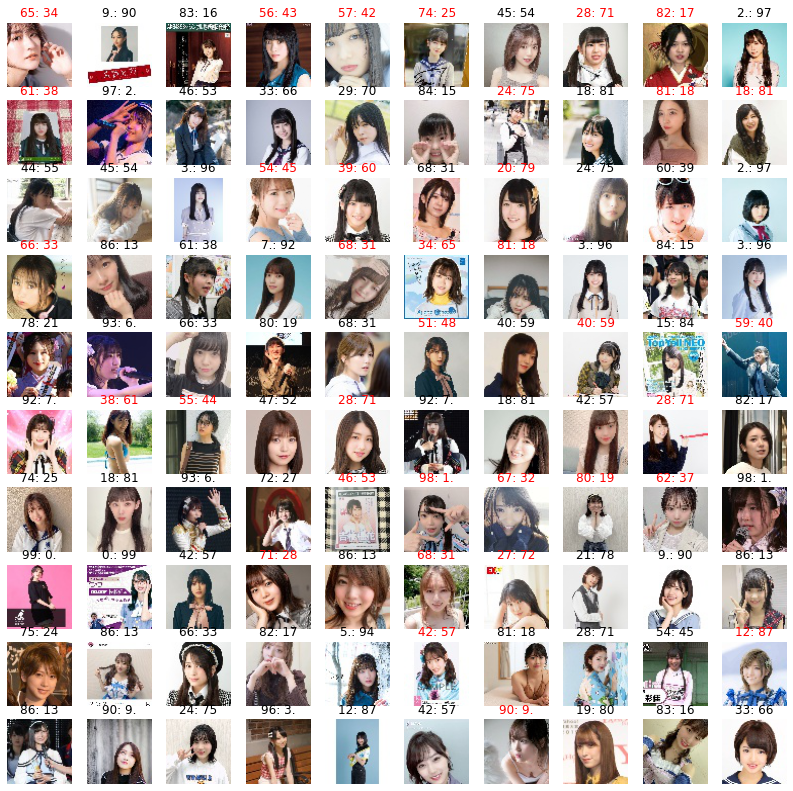

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,14))
y_raw = model.predict(X_test)
y_pred = np.argmax(y_raw, axis=-1) # argmaxでラベルを取る
y_correct = np.argmax(y_test, axis=-1)

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(X_test[i])
    ax.axis("off")
    # なぜか下のやり方だとうまくいかず
    # akb_percentage = 100*round(y_raw[i][0], 2)
    # saka_percentage = 100*round(y_raw[i][1], 2)
    akb_percentage = str(100*y_raw[i][0])[:2]
    saka_percentage = str(100*y_raw[i][1])[:2]
    if y_pred[i] == y_correct[i]:
        # ax.set_title(groups[y_pred[i]])

        ax.set_title(f"{akb_percentage}: {saka_percentage}")
    else:
        # ax.set_title(groups[y_pred[i]]+" / "+groups[int(y_correct[i])], color="red")

        ax.set_title(f"{akb_percentage}: {saka_percentage}", color="red")


In [26]:
round(3.99999, 2)
round(y_raw[117][0], 2)
str(100*y_raw[33][0])[:2]

'7.'

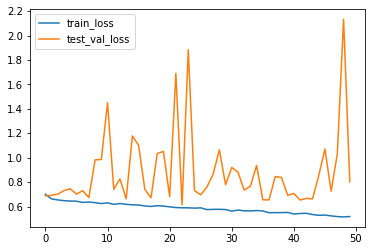

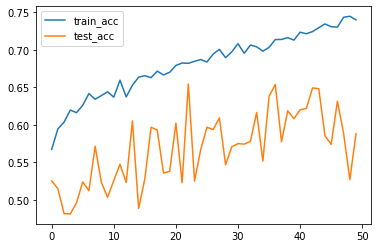

In [28]:
import matplotlib.pyplot as plt

train_loss = history.history['loss'] 
train_acc = history.history['accuracy'] 
val_loss = history.history['val_loss'] 
val_acc = history.history['val_accuracy'] 

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='test_val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='test_acc')
plt.legend()
plt.show()